In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

In [2]:
loans = pd.read_csv('loanstats.csv')
loans.head()

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,set,timestamp
0,1077501,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
1,1077430,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
2,1077175,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
3,1076863,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727
4,1075358,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,accepted,2017-11-14 14:43:31.403727


In [3]:
declined = pd.read_csv('declinestats.csv')
declined.head()

,loan_amnt,title,fico_range_low,dti,zip_code,addr_state,emp_length,policy_code,set,timestamp
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0,declined,2017-11-08 14:14:48.309059
1,1000.0,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0,declined,2017-11-08 14:14:48.309059
2,11000.0,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0,declined,2017-11-08 14:14:48.309059
3,6000.0,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0,declined,2017-11-08 14:14:48.309059
4,1500.0,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0,declined,2017-11-08 14:14:48.309059


In [59]:
combined = pd.concat([loans,declined], axis=0, ignore_index=True)

# User Profiles
## Credit Scores

In [4]:
loans.dropna(subset=['fico_range_low'], inplace=True)

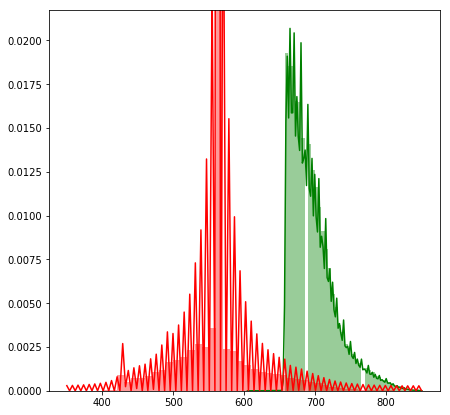

In [8]:
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
sns.distplot(loans['fico_range_low'].values, color='g')
sns.distplot(declined['fico_range_low'].values, color='r')

plt.show()

## Debt-To-Income Ratios

The DTI values have a very long tail, so to make it easier to visualize we are putting everything in the range of 0 to >100% (shown as 101%).

In [48]:
declined.loc[declined['dti'] <0,'dti'] = declined['dti'].mean()
declined.loc[declined['dti'] >100,'dti'] = 101
loans.loc[loans['dti'] <0,'dti'] = loans['dti'].mean()
loans.loc[loans['dti'] >100,'dti'] = 101

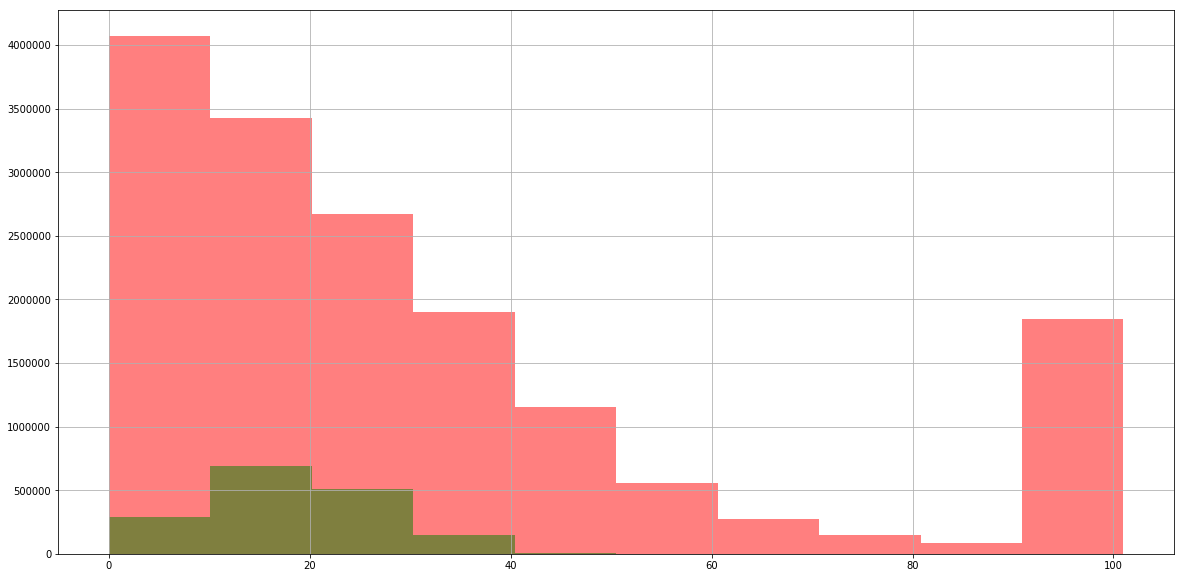

In [49]:
plt.close('all')
plt.figure(figsize=(20,10))
declined['dti'].hist(color='r', alpha=0.5)
loans['dti'].hist(color='g', alpha=0.5)
plt.show()

## Locations

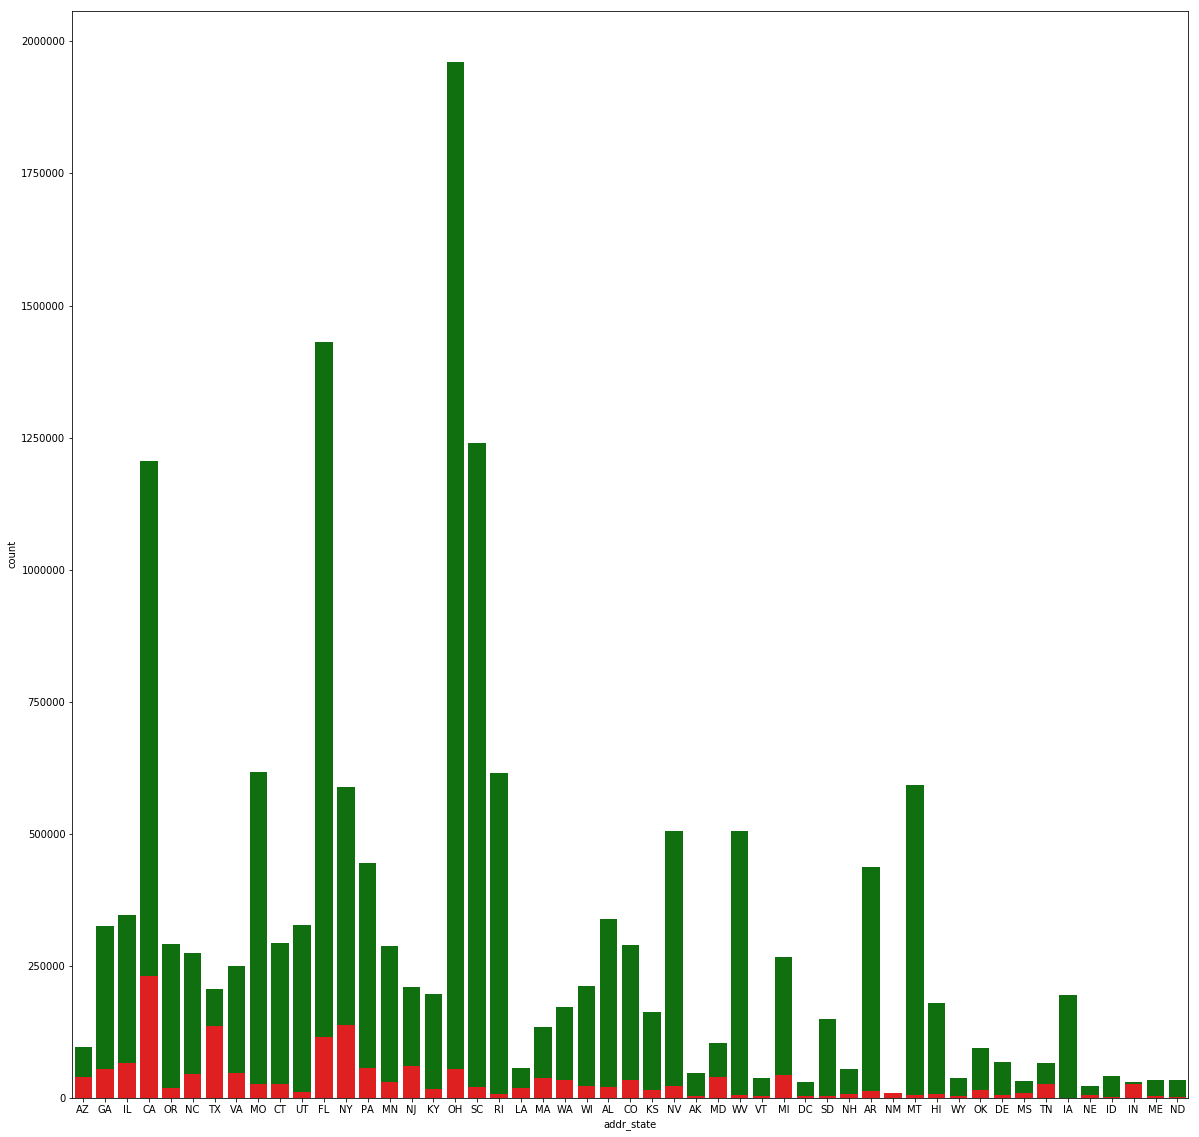

In [58]:
plt.close('all')
plt.figure(figsize=(20,20))

sns.countplot(x=declined['addr_state'], color='r')
sns.countplot(x=loans['addr_state'], color='g')
#sns.barplot(x=loans['addr_state'], y=loans['addr_state'].count());
plt.show()

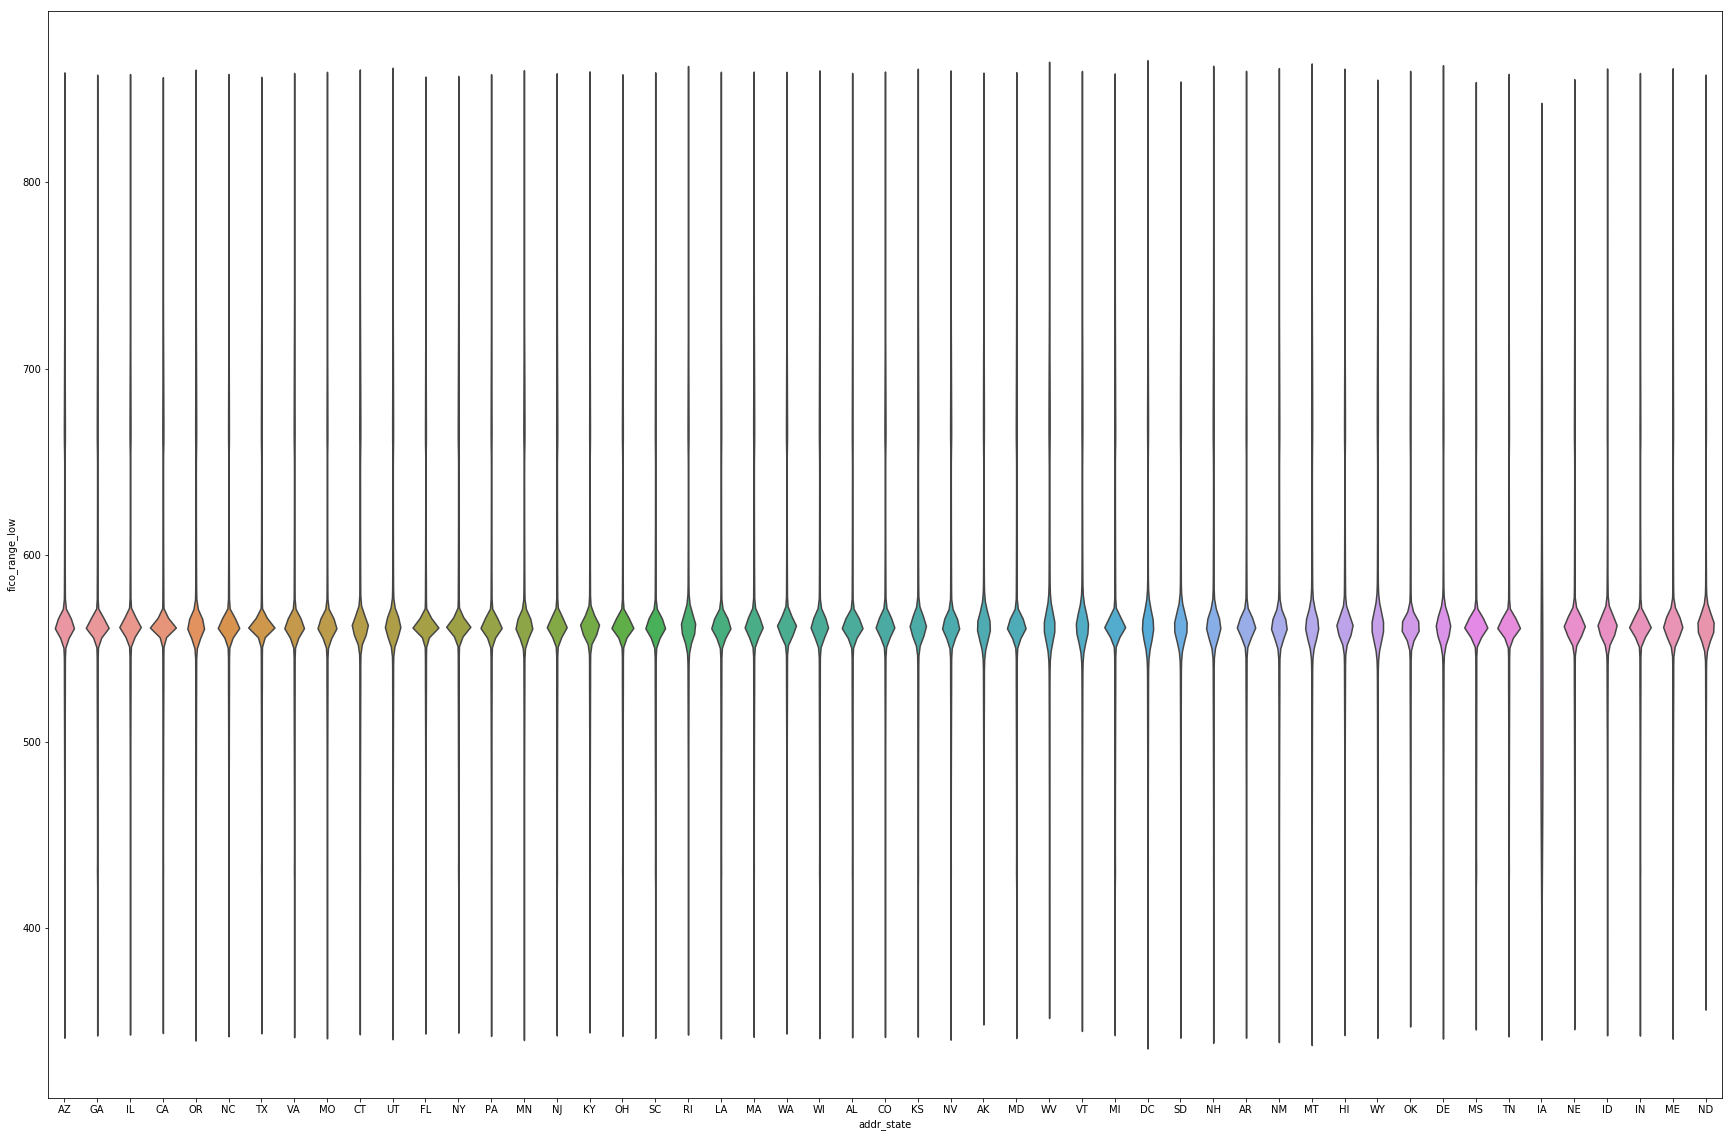

In [66]:
plt.close('all')
plt.figure(figsize=(30,20))

sns.violinplot(x=combined['addr_state'], y=combined['fico_range_low'], inner=None)

plt.show()

# Loan Amounts

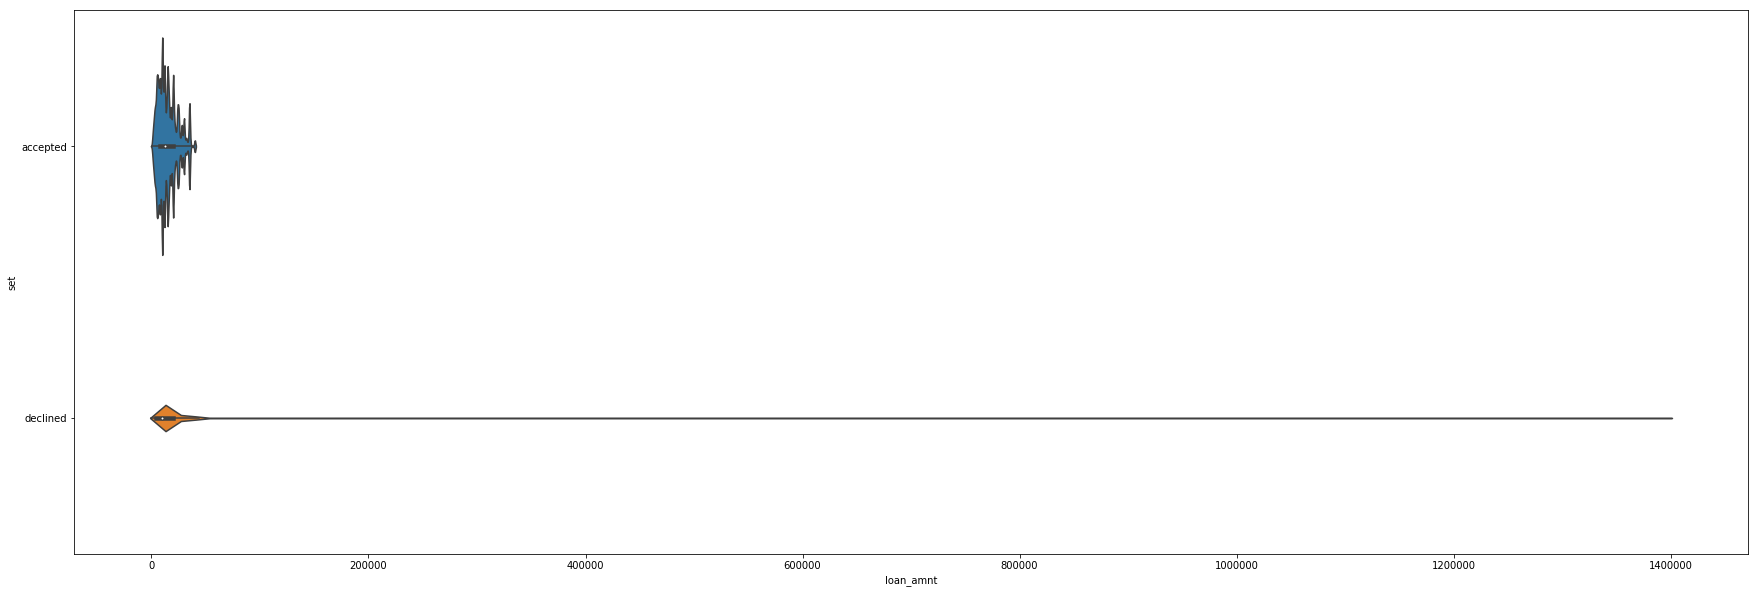

In [67]:
plt.close('all')
plt.figure(figsize=(30,10))
sns.violinplot(x="loan_amnt", y="set", data=combined)
plt.show()

# Loans

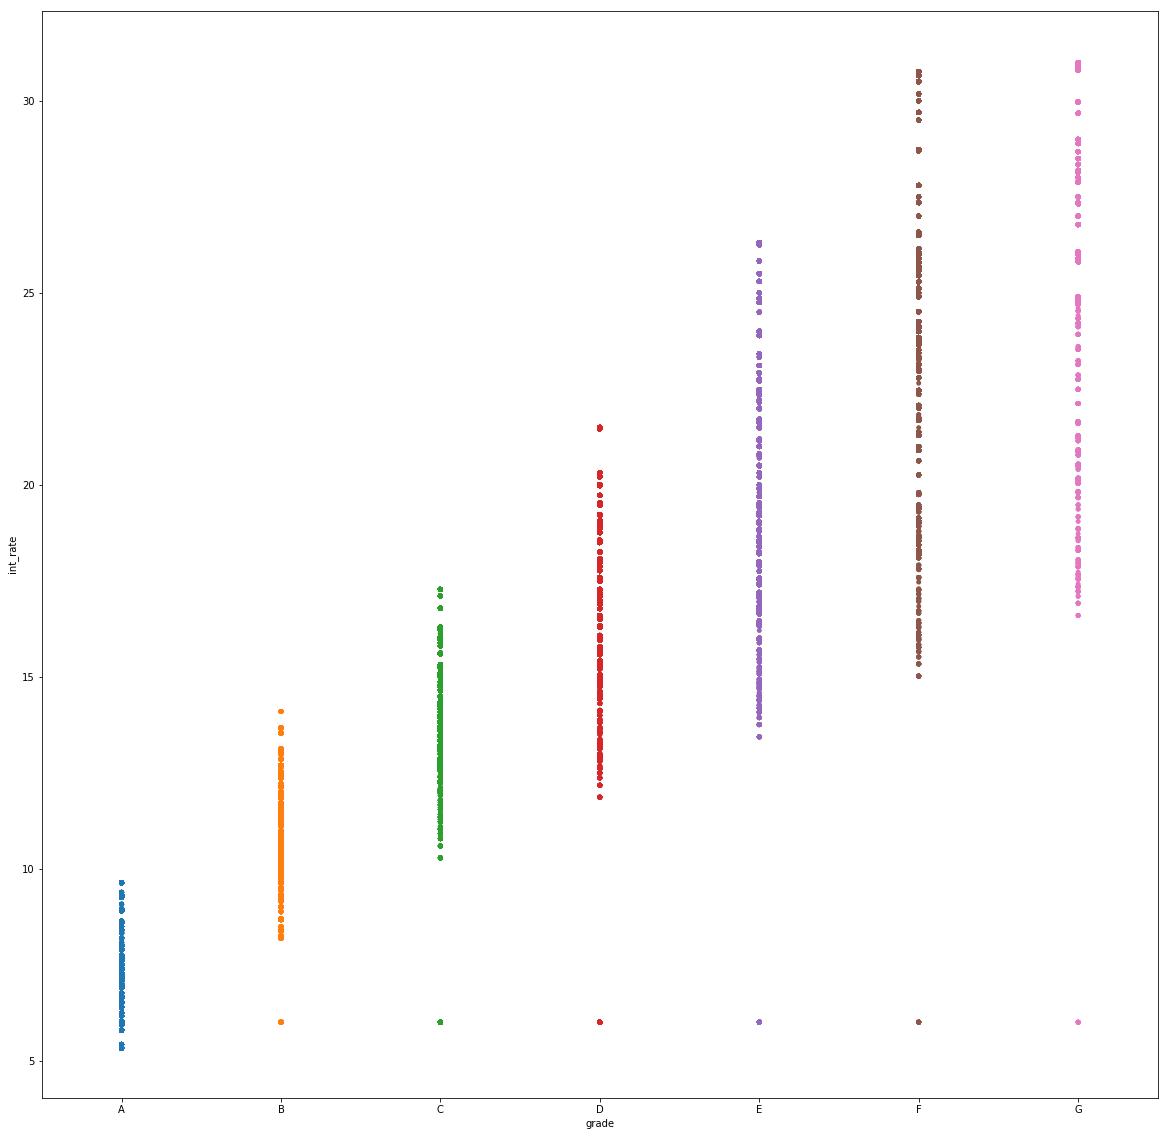

In [74]:
plt.close('all')
plt.figure(figsize=(20,20))

sns.stripplot(x="grade", y="int_rate", data=loans, order=['A','B','C','D','E','F','G'])

plt.show()